# Loan Eligibility Prediction

In [189]:
#Import dependencies 
import pandas as pd
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pickle 

In [108]:
#Load data 
loan_df = pd.read_csv('train.csv')

In [109]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [110]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [111]:
loan_df.shape

(614, 13)

In [112]:
loan_df.columns.values

array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'], dtype=object)

In [113]:
loan_df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [114]:
#Trait Missing Values 
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [115]:
#Dropping the missing values 
loan_df = loan_df.dropna()

In [116]:
loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [117]:
loan_df.shape

(480, 13)

In [118]:
#Relace Y with 1 and N with 0 in the label 
loan_df.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [119]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [120]:
#pre-process dependents columns 
loan_df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [121]:
#Replace 3+ value 
loan_df.replace({'Dependents' : {"3+" : "4"}},inplace=True)

In [122]:
loan_df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

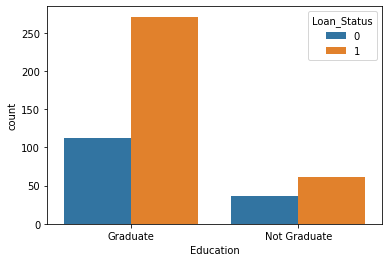

In [123]:
#Visulaize Data with Seaborn 
#First : Education and Label
sns.countplot(x ='Education', hue= 'Loan_Status' , data = loan_df  )

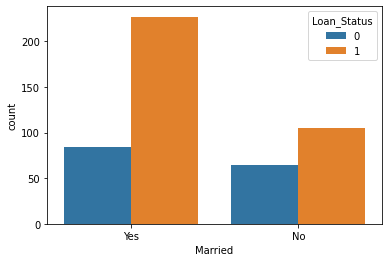

In [124]:
#First : Marital status and Label
sns.countplot(x ='Married', hue= 'Loan_Status' , data = loan_df  )

In [125]:
loan_df2 = loan_df.copy()

In [126]:
loan_df['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [127]:
#Encoding the others Categorical Values : Ordinal Encoding
loan_df.replace({
                "Gender" : {"Male":1,"Female":0},
                 "Married" : {"No":0 , "Yes":1},
                 "Self_Employed":{"No":0 , "Yes":1},
                 "Property_Area" : {
                     "Rural" : 0,
                     "Semiurban":1,
                     "Urban" : 2}, 
                 "Education" : {
                     "Graduate" : 1, 
                     "Not Graduate" : 0,
                 }
                 },inplace=True)

In [128]:
loan_df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1
613,LP002990,0,0,0,1,1,4583,0.0,133.0,360.0,0.0,1,0


In [129]:
#Separating Target and Labels 
X = loan_df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_df['Loan_Status']

In [130]:
print(X)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [131]:
print(Y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


In [132]:
#Train Test Split 
X_train, X_test, Y_train, Y_test  = train_test_split(X,Y,test_size = .1, stratify= Y,random_state=2)

In [133]:
print(X_train.shape)
print(X_test.shape)

(432, 11)
(48, 11)


In [184]:
#Training the model
modelo = svm.SVC(kernel='linear')

In [185]:
modelo.fit(X_train,Y_train)

SVC(kernel='linear')

In [186]:
#Model Evaluation on Train Data
predictions_train = modelo.predict(X_train)
print('Accuracy score on test data : ',accuracy_score(predictions_train,Y_train))

Accuracy score on test data :  0.7986111111111112


In [187]:
#Model Evaluation on Test Data 
predictions = modelo.predict(X_test)
print('Accuracy score on test data : ',accuracy_score(predictions,Y_test))

Accuracy score on test data :  0.8333333333333334


In [188]:
#Predictive System
input =(0,	0,	0,	1,	1,	4583,	0.0	,133.0,	360.0,	0.0	,1		)
# input = (1,	1,	0,	1,	1,	3000,	0.0,	66.0,	360.0,	1.0,	2)
input = np.asarray(input)
input_reshaped = input.reshape(1,-1)

prediction = modelo.predict(input_reshaped)

print( 'This client is eligible for the loan.' if prediction[0]==1 else 'This client is not eligible for the loan' )

This client is not eligible for the loan


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Using one hot encoding 

In [169]:
s = (loan_df2.dtypes == 'object')
object_cols = list(s[s].index)
object_cols.pop(0)
print(object_cols)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


In [170]:
loan_df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [171]:
X2 = loan_df2.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y2 = loan_df2['Loan_Status']

In [172]:
oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X2_oh = pd.DataFrame(oh_encoder.fit_transform(X2[object_cols]))

In [173]:
X2_oh.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [174]:
#Take the index back 
X2_oh.index = X2.index

In [175]:
X2_oh.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [176]:
X2.drop(columns=object_cols,axis=1,inplace=True)

In [177]:
#Concat 
X2_final =pd.concat([X2,X2_oh],axis=1)

In [178]:
#train_test_split 
X2_train , X2_test , Y2_train , Y2_test = train_test_split(X2_final,Y2,test_size=.1,stratify=Y,random_state=2)

In [179]:
model.fit(X2_train,Y2_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


SVC(kernel='linear')

In [183]:
predictions = model.predict(X2_test)
print('Accuracy Score With Oh Encoding and Test Data:',accuracy_score(predictions,Y2_test))
predictions2 = model.predict(X2_train)
print('Accuracy Score With Oh Encoding and Test Data:',accuracy_score(predictions2,Y2_train))

Accuracy Score With Oh Encoding and Test Data: 0.8333333333333334
Accuracy Score With Oh Encoding and Test Data: 0.8032407407407407


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [190]:
#Save the two models 
filename = 'loan_model_ordinalencod_trained.sav'
filename1 = 'loan_model_hotencod_trained.sav'
pickle.dump(modelo,open(filename,'wb'))
pickle.dump(model,open(filename1,'wb'))